In [114]:
import pandas as pd
#read data
fertilizer = pd.read_excel("./data/dap-fertilizer-360.xlsx")
phosphate = pd.read_excel("./data/rock-phosphate-360.xlsx")

plot

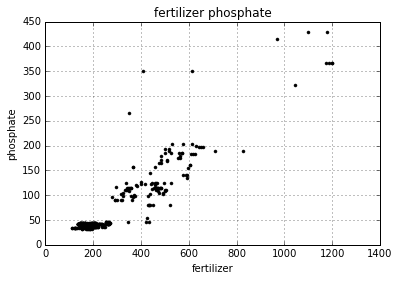

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.title('fertilizer phosphate')
plt.xlabel('fertilizer')
plt.ylabel('phosphate')
plt.plot(fertilizer['Price'], phosphate['Price'],'k.')
plt.grid(True)
plt.show()

stationary test before Granger granger causality test

In [118]:
# stationary test
import numpy as np
import statsmodels.tsa.stattools as ts

x_fer = fertilizer['Price']
x_pho = phosphate['Price']
fer_p_value = list()
pho_p_value = list()
for i in range(3):
    fer_p_value.append(ts.adfuller(x_fer, i)[1]) # maxlag is now set to i
    pho_p_value.append(ts.adfuller(x_pho, i)[1])
print(fer_p_value,pho_p_value)

[0.43623186272379683, 0.0014777108236450796, 0.042141475078583894] [0.38803385403519225, 0.100076417328955, 0.026177972983485478]


fertilizer is stable in diff 1, 
phosphate is stable in diff 2

In [119]:
from statsmodels.tsa.stattools import grangercausalitytests

"""The Null hypothesis for grangercausalitytests is that the time series in
the second column, x2, does NOT Granger cause the time series in the first
column, x1. Grange causality means that past values of x2 have a
statistically significant effect on the current value of x1, taking past
values of x1 into account as regressors. We reject the null hypothesis
that x2 does not Granger cause x1 if the pvalues are below a desired size
of the test."""

fer = fertilizer['Price'].diff(1)[2:] #fertilizer is stable in diff 1
pho = phosphate['Price'].diff(2)[2:] #phosphate is stable in diff 2
dt = pd.DataFrame({'fertilizer':fer,'phosphate':pho})
# y is fertilizer
gr = grangercausalitytests(dt, maxlag=10, addconst=True, verbose=True)
gr[5][1][0].summary()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3117  , p=0.0042  , df_denom=355, df_num=1
ssr based chi2 test:   chi2=8.3819  , p=0.0038  , df=1
likelihood ratio test: chi2=8.2853  , p=0.0040  , df=1
parameter F test:         F=8.3117  , p=0.0042  , df_denom=355, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1537  , p=0.8576  , df_denom=352, df_num=2
ssr based chi2 test:   chi2=0.3118  , p=0.8556  , df=2
likelihood ratio test: chi2=0.3117  , p=0.8557  , df=2
parameter F test:         F=0.1537  , p=0.8576  , df_denom=352, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6264  , p=0.5983  , df_denom=349, df_num=3
ssr based chi2 test:   chi2=1.9170  , p=0.5898  , df=3
likelihood ratio test: chi2=1.9119  , p=0.5909  , df=3
parameter F test:         F=0.6264  , p=0.5983  , df_denom=349, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.0117  , p=0.0924  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     83.79
Date:                Mon, 29 May 2017   Prob (F-statistic):           1.37e-57
Time:                        22:46:39   Log-Likelihood:                -1600.7
No. Observations:                 354   AIC:                             3213.
Df Residuals:                     348   BIC:                             3237.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9330      0.054     17.413      0.000         0.828     1.038
x2            -0.3287      0.073     -4.505      0.000        -0.472    -0.185
x3            -0.0350      0.075     -0.466      0.641        -0.183     0.113
x4             0.1187      0.073      1.623      0.105        -0.025     0.263
x5            -0.0321      0.054     -0.598      0.550        -0.138     0.073
const          0.1522      1.194      0.128      0.899        -2.195     2.500
==============================================================================
Omnibus:                      370.363   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55511.740
Skew:                          -3.950   Prob(JB):                         0.00
Kurtosis:                      63.837   Cond. No.                         54.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Differencing fertilizer and phosphate time series data in different order makes it difficult to explain the meaning. I tried to test on original time series, and find it results in better performance on regression.

In [113]:
fer = fertilizer['Price']
pho = phosphate['Price']
dt = pd.DataFrame({'fertilizer':fer,'phosphate':pho})
dt = dt[['phosphate', 'fertilizer']]
# y is phosphate
gr = grangercausalitytests(dt, maxlag=10, addconst=True, verbose=True)
gr[9][1][0].summary()


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=223.3162, p=0.0000  , df_denom=357, df_num=1
ssr based chi2 test:   chi2=225.1928, p=0.0000  , df=1
likelihood ratio test: chi2=174.9014, p=0.0000  , df=1
parameter F test:         F=223.3162, p=0.0000  , df_denom=357, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=79.7876 , p=0.0000  , df_denom=354, df_num=2
ssr based chi2 test:   chi2=161.8292, p=0.0000  , df=2
likelihood ratio test: chi2=133.5838, p=0.0000  , df=2
parameter F test:         F=79.7876 , p=0.0000  , df_denom=354, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=53.4933 , p=0.0000  , df_denom=351, df_num=3
ssr based chi2 test:   chi2=163.6805, p=0.0000  , df=3
likelihood ratio test: chi2=134.7950, p=0.0000  , df=3
parameter F test:         F=53.4933 , p=0.0000  , df_denom=351, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=35.9394 , p=0.0000  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1518.
Date:                Mon, 29 May 2017   Prob (F-statistic):          1.15e-269
Time:                        22:42:10   Log-Likelihood:                -1343.4
No. Observations:                 352   AIC:                             2707.
Df Residuals:                     342   BIC:                             2746.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2472      0.054     23.185      0.000         1.141     1.353
x2            -0.1814      0.085     -2.122      0.035        -0.349    -0.013
x3             0.1881      0.084      2.232      0.026         0.022     0.354
x4            -0.2814      0.083     -3.372      0.001        -0.446    -0.117
x5             0.0874      0.085      1.032      0.303        -0.079     0.254
x6            -0.2903      0.083     -3.477      0.001        -0.454    -0.126
x7             0.3180      0.084      3.770      0.000         0.152     0.484
x8            -0.2178      0.086     -2.547      0.011        -0.386    -0.050
x9             0.1012      0.054      1.881      0.061        -0.005     0.207
const          2.3587      0.950      2.484      0.013         0.491     4.227
==============================================================================
Omnibus:                      308.619   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31909.025
Skew:                           2.995   Prob(JB):                         0.00
Kurtosis:                      49.257   Cond. No.                         492.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""